In [1]:
# Import all necessary modules.
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Reset the PN sequence generator.
seed = 42
np.random.seed(seed)

### Gerando exemplos da função a ser mapeada.

$$y = x^2, -1 \leq x \leq 1$$

In [3]:
# Number of examples.
N = 1000

# Attribute.
x = np.linspace(-1, 1, N).reshape(N, 1)

# Function to be approximated.
y = x**2

### Plotando a função.

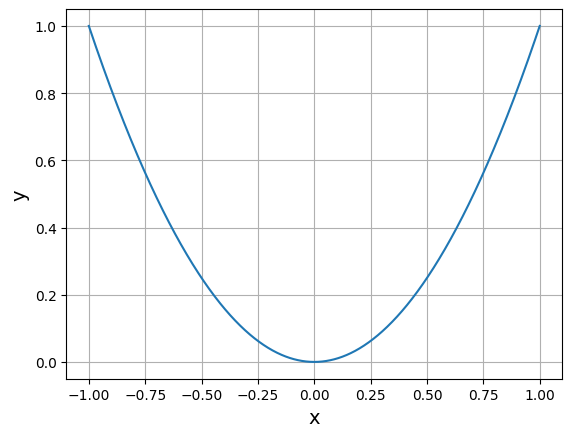

In [4]:
plt.plot(x,y)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid()
plt.show()

### Qual deve ser o número de camadas, nós e função de ativação de uma rede MLP para que ela aproxime a função acima?

Para descobrirmos, iremos utilizar uma abordagem de validação cruzada chamada de busca em grid, ou Grid Search.

### Dividindo os exemplos em conjuntos de treinamento e validação.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

### Aproximando a função com uma rede MLP.

+ A classe `MLPRegressor` é usada para aproximar funções.
+ Ela possui vários hiperparâmetros que precisam ser configurados, como por exemplo, número de camadas escondidas e de nós em cada camada (`hidden_layer_sizes`), função de ativação das camadas escondidas (`activation`), otimizador (`solver`), o estado inicial do gerador de sequências pseudo-aleatórias (`random_state`), etc.
+ Por realizar uma tarefa de regressão, a classe `MLPRegressor` **não possui função de ativação na camada de saída**. Isso pode ser interpretado sendo uma **função de ativação do identidade**.
    + A saída dos nós é a própria ativação (i.e., a soma ponderada das entradas do nó).
+ Sua documentação pode ser acessada através do link abaixo.
    * https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
+ Portanto, devido a esse grande número de hiperparâmetros, surgem algumas dúvidas:
    + Qual o melhor conjunto de valores dos hiperparâmetros para esta tarefa?
    + Como podemos encontrar este conjunto de valores ideais?

### Busca em grade.

+ Para encontrar o conjunto de valores ideais, usamos a classe `GridSearch`.
+ A classe `GridSearch` faz uma **busca exaustiva** através da combinação de todos os valores dos hiperparâmetros especificados em um **dicionário de hiperparâmetros**.
+ Por padrão, a classe `GridSearch` utiliza validação cruzada do tipo **k-Fold**.
+ Como pontuação (i.e., `scoring`) da classe `GridSearch`, usamos o negativo do EQM, i.e., `scoring=neg_mean_squared_error`
+ A documentação da classe `GridSearch` pode ser encontrada em
    * https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV


+ No exemplo abaixo, usamos um objeto da classe `GridSearch`com número de folds, $k$, (i.e., divisões) igual a $10$ para encontrar qual o melhor conjunto de valores dos hiperparâmetros da classe `MLPRegressor`, de tal forma que ela resolva o problema da aproximação de funçao (i.e., regressão) da melhor forma possível.

+ Neste exemplo, o `GridSearch` tem como objetivo encontar o melhor valor para os seguintes hiperparâmetros:
    + número de camadas escondidas e de nós,
    + função de ativação,
    + otimizador,
    + semente do gerador de sequências PN (lembrem-se que a inicialização dos pesos da rede afeta o seu treinamento).
    
    
+ O nome das chaves no dicionário de hiperparâmetros deve ser igual ao nome do hiperparâmetro do modelo a ser testado.
    + No caso deste exemplo, os nomes das chaves devem seguir os nomes dos hiperparâmetro da classe `MLPRegressor`, que é a classe que queremos otimizar.
    
    
+ O dicionário de hiperparâmetros, chamado no código de exemplo de `parameters`, que é passado para o `GridSearchCV` contém os parâmetros do objeto da classe `MLPRegressor` que desejamos testar e verificar qual combinação deles resulta no melhor resultado.


+ Portanto, o `GridSearchCV` automatiza os testes que vão descobrir dentre esses valores do dicionário `parameters` quais são os melhores para cada hiperparâmetro.

In [6]:
# Dictionary with the hyperparameters to be checked.
parameters = {
    'hidden_layer_sizes' : [(10,), (20,), (40,), (10,5), (20,10), (40,20,10)],
    'activation' : ['logistic', 'tanh', 'identity', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'random_state' : [0, 1, 13, 17, 42, 51, 69, 81, 89, 99]
}

# Instantiate MLPregressor.
# Perceba que só configuramos um hiperparâmetro, o restante é encontrado pelo GridSearch.
reg = MLPRegressor(max_iter=5000)

# Instantiate GridSearchCV.
gs = GridSearchCV(reg, parameters, cv=10, scoring='neg_mean_squared_error')

# Train the MLP regressor with grid search.
gs.fit(x_train, y_train.ravel())

GridSearchCV(cv=10, estimator=MLPRegressor(max_iter=5000),
             param_grid={'activation': ['logistic', 'tanh', 'identity', 'relu'],
                         'hidden_layer_sizes': [(10,), (20,), (40,), (10, 5),
                                                (20, 10), (40, 20, 10)],
                         'random_state': [0, 1, 13, 17, 42, 51, 69, 81, 89, 99],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='neg_mean_squared_error')

**OBS.**: Percebam que não definimos o vetor de atributo bias explicitamente nas matrizes de atributos de treinamento e validação, isso é feito pela própria rede neural através dos termos de bias de cada nó.

### Imprime os melhores valores para os hiperparâmetros encontrados pelo Grid Search.

O atribto `best_params_` imprime os melhores valores para os hiperparâmetros.

In [7]:
print(gs.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (40,), 'random_state': 13, 'solver': 'lbfgs'}


### Comparando a função original e sua aproximação.

**OBS**.: Após o treinamento, podemos usar o próprio objeto da classe `GridSearchCV` para realizar predições com o método `predict`. As predições são feitas com o objeto da classe `MLPRegressor` com o melhor conjunto de valores encontrados para os hiperparâmetros especificados.

MSE: 7.70735385559457e-07


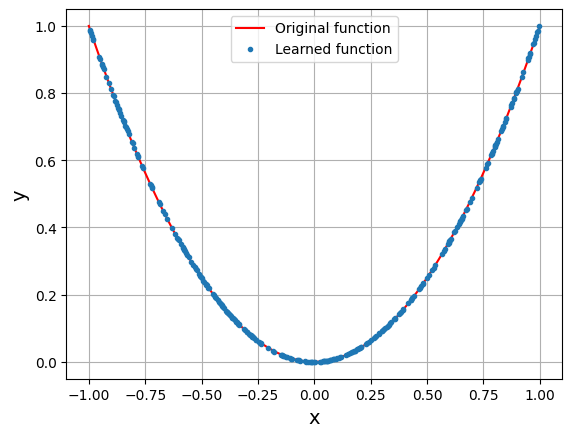

In [8]:
# Prediction with trained model and validation set.
y_pred = gs.predict(x_test)

# Calculate the mean squared error.
mse = mean_squared_error(y_pred, y_test)
print('MSE:', mse)

# Plot the comparison between predicted and original functions.
plt.plot(x,y,'r',label='Original function')
plt.plot(x_test,y_pred,'.',label='Learned function')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.grid()
plt.show()